## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, how="outer",on="Mouse ID")

## Summary statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_regimen = mouse_results.groupby(by=["Drug Regimen"]).agg(meanTV = ("Tumor Volume (mm3)","mean"),
                                               medianTV = ("Tumor Volume (mm3)","median"),
                                               stdTV = ("Tumor Volume (mm3)",np.std),
                                               semTV = ("Tumor Volume (mm3)",st.sem),
                                               countTV = ("Tumor Volume (mm3)","count"))

# Order alues according to mean
summary_regimen.sort_values(by="meanTV", ascending=False, inplace=True)

# Apply some formatting to the output of the Summary Table per Regimen
summary_regimen.style.format({"meanTV":"{:,.2f}",
                             "medianTV":"{:,.2f}",
                             "stdTV":"{:,.2f}",
                             "semTV":"{:,.2f}"})

,meanTV,medianTV,stdTV,semTV,countTV
Drug Regimen,,,,,
Ketapril,55.24,53.70,8.28,0.60,188
Naftisol,54.33,52.51,8.13,0.60,186
Stelasyn,54.23,52.43,7.71,0.57,181
Placebo,54.03,52.29,7.82,0.58,181
Zoniferol,53.24,51.82,6.97,0.52,182
Infubinol,52.88,51.82,6.57,0.49,178
Ceftamin,52.59,51.78,6.27,0.47,178
Propriva,52.32,50.85,6.51,0.51,161
Capomulin,40.68,41.56,4.99,0.33,230


## Bar plots

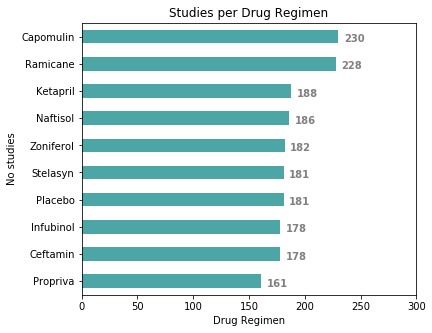

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_reg = summary_regimen["countTV"].sort_values(ascending=True)

fig, ax = plt.subplots()
drug_reg.plot(kind="barh", align="center", color="teal", alpha=0.7, figsize=(6,5))
plt.title("Studies per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No studies")
plt.xlim(0,300)

#Add data labels to graph
for i, value in enumerate(drug_reg):
    ax.text(value + 5, i - 0.2, str(value), color='grey', fontweight='bold')

plt.show()

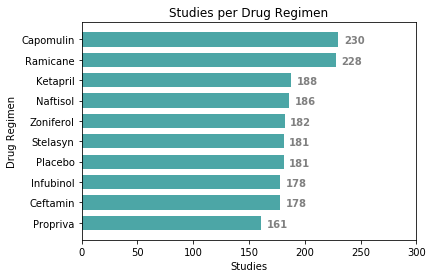

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = summary_regimen["countTV"].sort_values(ascending=True)
y_pos = np.arange(len(counts))

#Get the axis for the plot
fig, ax = plt.subplots()
ax.barh(y_pos,counts, height=0.7, align="center", color="teal", alpha=0.7)
plt.yticks(y_pos,summary_regimen["countTV"].sort_values(ascending=True).index)
plt.title("Studies per Drug Regimen")
plt.xlabel("Studies")
plt.ylabel("Drug Regimen")
plt.xlim(0,300)

#Add data labels to graph
for i, value in enumerate(counts):
    ax.text(value + 5, i - 0.2, str(value), color='grey', fontweight='bold')

plt.show()


## Pie plots

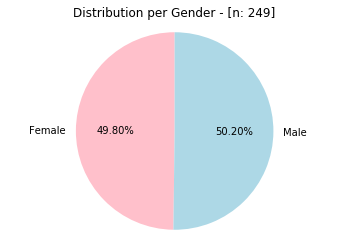

In [5]:
# Get unique count pere mouse in the data
mouse_gender = mouse_results.groupby(by=["Sex","Mouse ID"],as_index=False).max()
# Get the number of actual mice per gender
mouse = mouse_gender.groupby("Sex")["Mouse ID"].count()
mouse.plot(kind="pie", autopct="%1.2f%%",startangle=90, colors = ["pink", "lightblue"])
plt.title(f"Distribution per Gender - [n: {sum(mouse)}]")
plt.ylabel("")
plt.axis("equal")
plt.show()

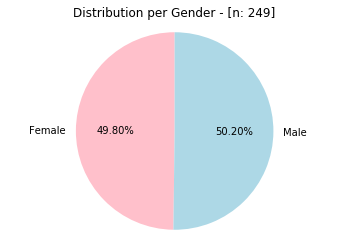

In [6]:
# Generate a new table without index to access its columns
mouse = mouse_gender.groupby("Sex", as_index=False)["Mouse ID"].count()
x_labels = [x for x in mouse["Sex"]]
y_values= mouse["Mouse ID"]
colors = ["pink", "lightblue"]
plt.pie(y_values, labels = x_labels, colors = colors, autopct="%1.2f%%", startangle=90)
plt.axis("equal")
plt.title(f"Distribution per Gender - [n: {sum(y_values)}]")
plt.show()

## Quartiles, outliers and boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
mouse_prom_reg = mouse_results.loc[((mouse_results["Drug Regimen"] == "Capomulin") |
                                   (mouse_results["Drug Regimen"] == "Ramicane")   |
                                   (mouse_results["Drug Regimen"] == "Infubinol")  |
                                   (mouse_results["Drug Regimen"] == "Ceftamin"))  
                                   & (mouse_results["Timepoint"] == 45) # Final tumor volume
                                  ]

In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quantiles = mouse_prom_reg["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq - lowerq
uwhisker = upperq + (1.5 * iqr)
lwhisker = lowerq - (1.5 * iqr)

print("=======================================================================")
# Get potential outliers
outliers = mouse_prom_reg.loc[(mouse_prom_reg["Tumor Volume (mm3)"] < lwhisker) |
                              (mouse_prom_reg["Tumor Volume (mm3)"] > uwhisker)]

# Validate if there is any outlier
if len(outliers) > 0:
    print(f"The outliers are: {len(outliers)}")
    display(outliers)
else:
    print("there are no potential outliers")


there are no potential outliers


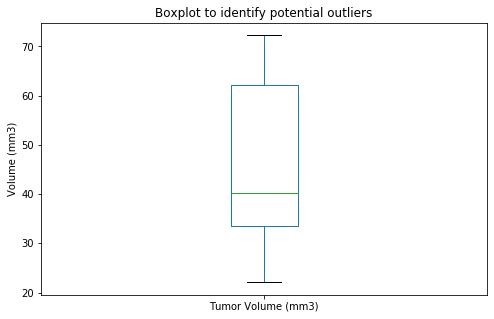

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_prom_reg["Tumor Volume (mm3)"].plot(kind="box", figsize=(8,5))
plt.title("Boxplot to identify potential outliers")
plt.ylabel("Volume (mm3)")
plt.xlabel("")
plt.show()

## Line and scatter plots

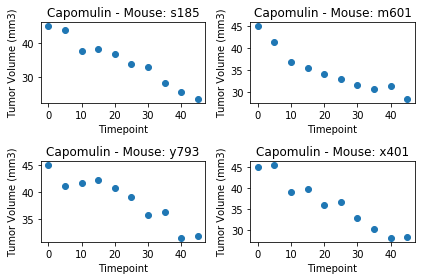

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Establish search criteria
regimen = "Capomulin"
mice = ["s185","m601","y793","x401"]
i = 221
for mouse in mice:
    capomulin_mouse = mouse_results.loc[((mouse_results["Drug Regimen"] == regimen)) 
                                    & (mouse_results["Mouse ID"]== mouse),
                                   ["Timepoint","Tumor Volume (mm3)"]]
    plt.subplot(i)
    plt.scatter(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
    plt.title(f"{regimen} - Mouse: {mouse}")
    plt.xlabel("Timepoint")
    plt.ylabel("Tumor Volume (mm3)")
    i+=1
plt.tight_layout()
plt.show()

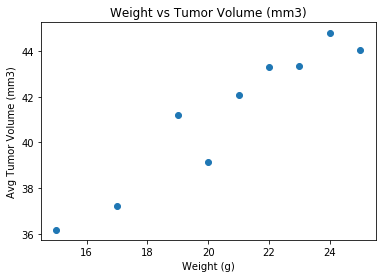

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mouse_avg = mouse_results.loc[((mouse_results["Drug Regimen"] == regimen)),["Weight (g)","Tumor Volume (mm3)"]]
capomulin_mouse_avg = capomulin_mouse_avg.groupby(by="Weight (g)", as_index=False).mean()
plt.scatter(capomulin_mouse_avg["Weight (g)"], capomulin_mouse_avg["Tumor Volume (mm3)"])
plt.title("Weight vs Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")


plt.show()

In [39]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
# for the Capomulin regimen
corr, _ = st.pearsonr(capomulin_mouse_avg["Weight (g)"], capomulin_mouse_avg["Tumor Volume (mm3)"])
print(f" The correlation is: {corr}")

 The correlation is: 0.9505243961855269


In [42]:
# Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_avg["Weight (g)"], 
                                                           capomulin_mouse_avg["Tumor Volume (mm3)"])
# y = mx + b
y_values = []
for weight in capomulin_mouse_avg["Weight (g)"]:
    regress_value = (slope * weight) + intercept
    y_values.append(regress_value)

equation = f" y = {str(round(slope,2))}*x + {str(round(intercept,2))}"
print(f"Equation: {equation}")


Equation:  y = 0.89*x + 22.76


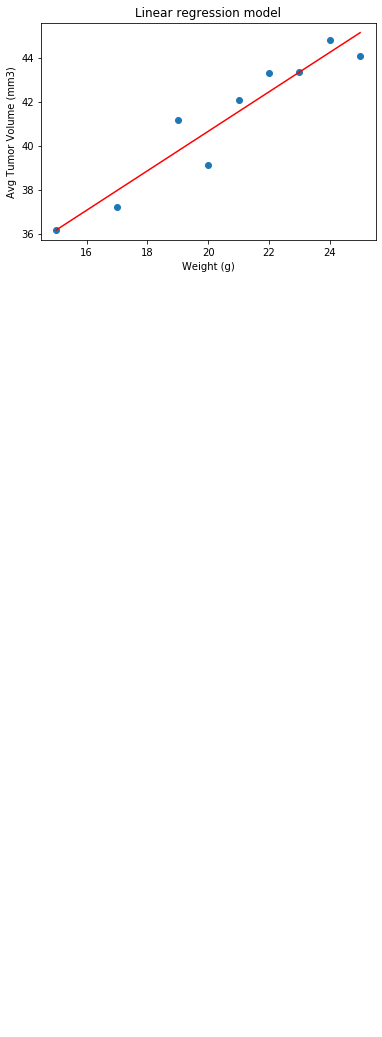

In [43]:
#Plot 
# Create Plot
plt.scatter(x=capomulin_mouse_avg["Weight (g)"], y=capomulin_mouse_avg["Tumor Volume (mm3)"])
# regression
plt.plot(capomulin_mouse_avg["Weight (g)"],y_values,"r-")
plt.title("Linear regression model")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
# Label plot and annotate the line equation
plt.annotate(equation, (20,0), fontsize = 10, color="blue")
plt.show()